<a href="https://colab.research.google.com/github/Gitinitty-5/Python-Projects/blob/main/heart_disease_prediction_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Estimation of Prediction for Getting Heart Disease Using Logistic Regression Model of Machine Learning
.In this example, we want to investigate what factors/variables affect some getting Coronary Heart Disease

.Make predictions whether a individual could be subjected to Coronary Heart Disease and not based on their characteristics.

.Hence our Dependent variable(y) is the TenYearCHD or if individual is prone to future Heart Disease or not

##1.1 Import Libraries

In [2]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn as sk
import scipy as sc

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from math import sqrt

%matplotlib inline

# To install sklearn type "pip install numpy scipy scikit-learn" to the anaconda terminal

# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(12,10)})


##1.1 Data Acquisition

In [3]:
from google.colab import drive
from google.colab import files # Import the 'files' object from google.colab

drive.mount('/content/drive')
uploaded = files.upload() # Now 'files' is defined and the upload() function should be available

Mounted at /content/drive


Saving framingham_data.xlsx to framingham_data.xlsx


In [4]:
##load raw data
df = pd.read_excel('framingham_data.xlsx')
#print shape
df.shape

#print table
df

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [5]:
import pandas as pd
df = pd.read_excel('framingham_data.xlsx')

#Drop education column
df.drop(['education'], axis=1, inplace=True)

#Print shape
df.shape

df

,sex,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   currentSmoker    4238 non-null   int64  
 3   cigsPerDay       4209 non-null   float64
 4   BPMeds           4185 non-null   float64
 5   prevalentStroke  4238 non-null   int64  
 6   prevalentHyp     4238 non-null   int64  
 7   diabetes         4238 non-null   int64  
 8   totChol          4188 non-null   float64
 9   sysBP            4238 non-null   float64
 10  diaBP            4238 non-null   float64
 11  BMI              4219 non-null   float64
 12  heartRate        4237 non-null   float64
 13  glucose          3850 non-null   float64
 14  TenYearCHD       4238 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 496.8 KB


In [7]:
df.describe()

,sex,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


1.3 Dealing with null values & filling the null values

In [8]:
#checking for null values
df.isnull().sum()

,0
sex,0
age,0
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50
sysBP,0


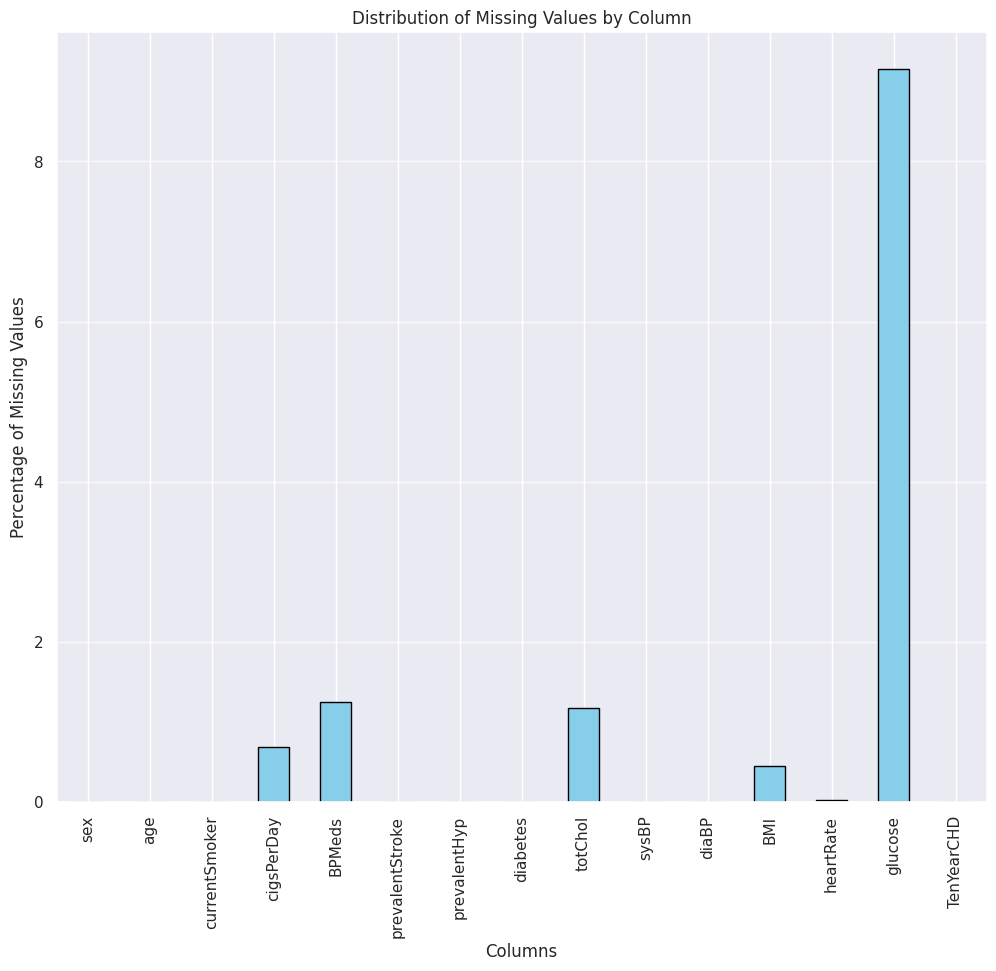

In [9]:
# Calculate the percentage of missing values for each column
missing_values = pd.DataFrame(df.isnull().sum() / len(df) * 100, columns=['Percentage'])

# Plot the missing values as a bar chart
missing_values.plot(kind='bar', legend=False, color='skyblue', edgecolor='black')
plt.title('Distribution of Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.grid(axis='y', alpha=0.75)
plt.show()

1.3 Eliminating and replacing null values

In [10]:
# Replace null values with the median of the 'cigsPerDay' column
df['cigsPerDay'].fillna(df['cigsPerDay'].median(), inplace = True)

#Replace null values with max of the 'BPMeds' column
df['BPMeds'].fillna(df['BPMeds'].max(), inplace = True)

# Replace null values with the max of the 'totChol' column
df['totChol'].fillna(df['totChol'].mean(), inplace = True)

# Replace null values with the mean of the 'BMI' column
df['BMI'].fillna(df['BMI'].mean(), inplace = True)

# Replace null values with mean of the 'heartRate' column
df['heartRate'].fillna(df['heartRate'].mean(), inplace = True)

# Replace null values with the max of the 'glucose' column
df['glucose'].fillna(df['glucose'].median(), inplace = True)

<ipython-input-10-6487daf997c5>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cigsPerDay'].fillna(df['cigsPerDay'].median(), inplace = True)
<ipython-input-10-6487daf997c5>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [11]:
df.isnull().sum()

,0
sex,0
age,0
currentSmoker,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0
sysBP,0


##1.4 Checking for row duplicates

In [12]:
#to check for row duplicates
df.duplicated().sum()

0

1.5 Check for all columns in the dataframe

In [13]:
df.columns

Index(['sex', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [64]:
df['sex'].value_counts(normalize = True)

,proportion
sex,
0,0.570788
1,0.429212


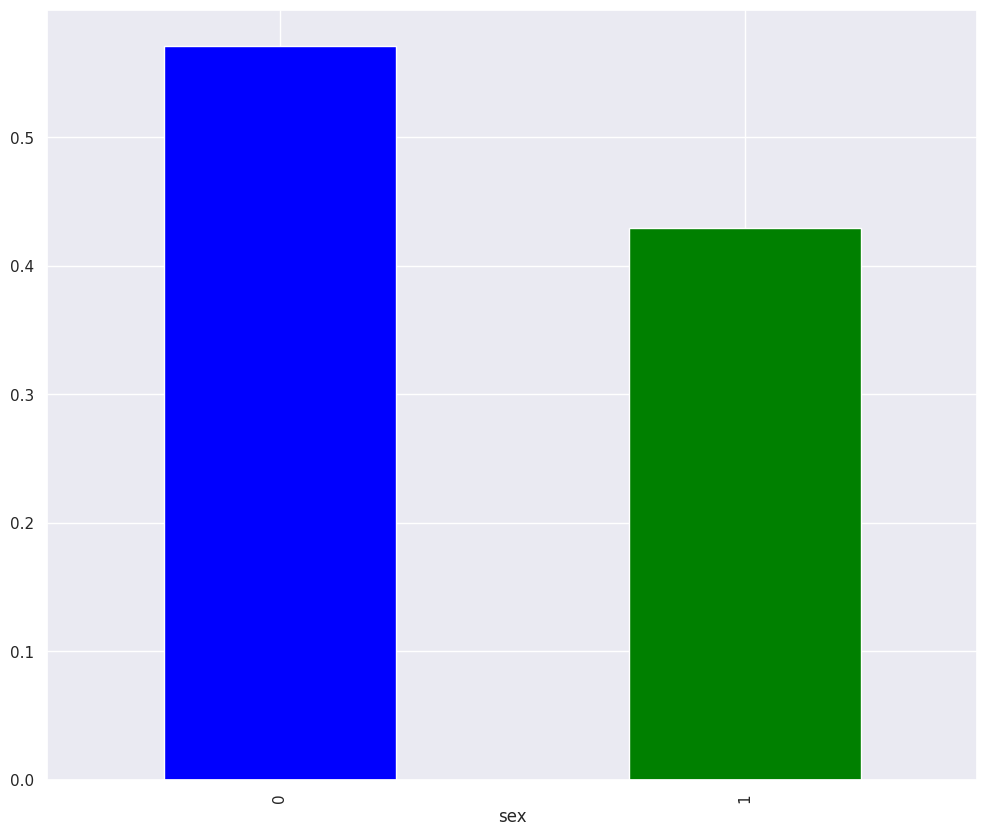

In [70]:
df['sex'].value_counts(normalize = True).plot(kind = 'bar', color = ['blue', 'green'])
plt.show()

In [16]:
df.groupby('sex').mean()

,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
sex,,,,,,,,,,,,,,
0,49.800331,0.408433,5.684167,0.052501,0.006201,0.308392,0.023563,239.410925,133.040099,82.295163,25.514311,77.094667,81.403886,0.124432
1,49.298516,0.608026,13.273227,0.027488,0.005498,0.313359,0.028587,233.145163,131.437878,83.689115,26.184601,74.262165,81.869159,0.188565


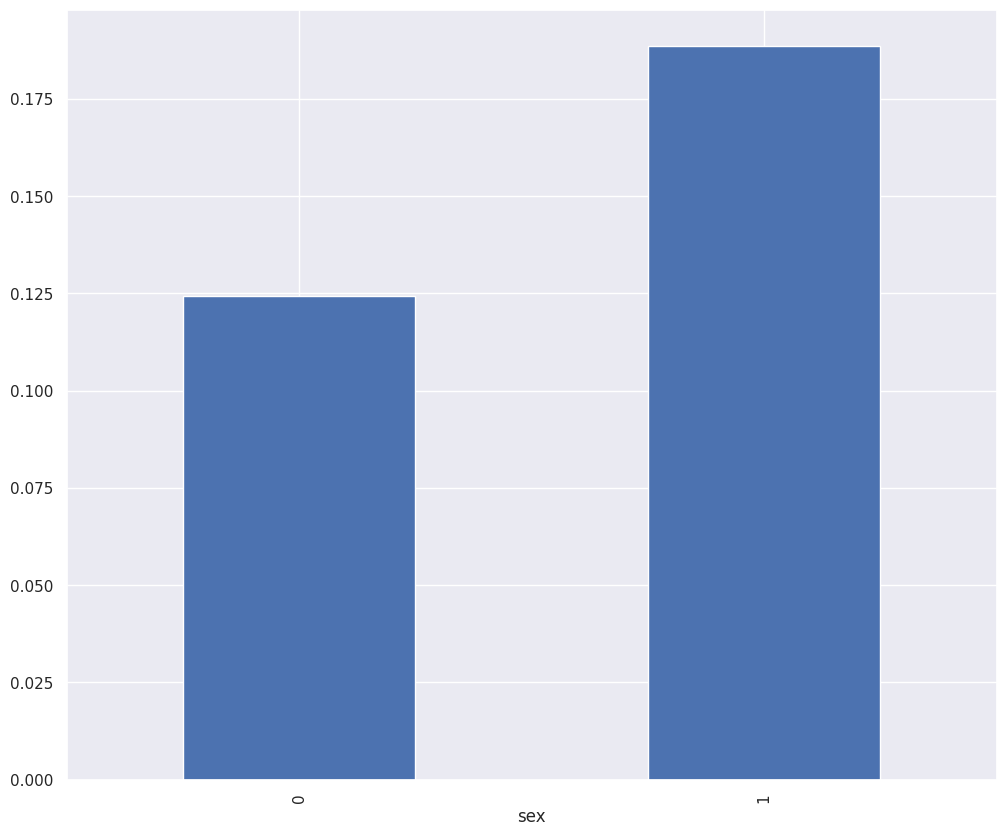

In [17]:
df.groupby('sex')['TenYearCHD'].mean().plot(kind = 'bar')
plt.show()

In [65]:
#Importing LabelEncoder from preprocessing sklearn
from sklearn.preprocessing import LabelEncoder

In [19]:
#Creating an instance of LabelEncoder
le = LabelEncoder()

In [20]:
df['diabetes'].value_counts(normalize = True)

,proportion
diabetes,
0,0.97428
1,0.02572


In [21]:
df.groupby('diabetes').mean()

,sex,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
diabetes,,,,,,,,,,,,,,
0,0.427949,49.443933,0.497699,9.011383,0.040203,0.005813,0.304674,236.432879,131.953984,82.796077,25.744966,75.783211,79.350690,0.146282
1,0.477064,54.926606,0.357798,6.293578,0.100917,0.009174,0.532110,247.657996,147.444954,86.582569,27.962789,79.504587,166.944954,0.366972


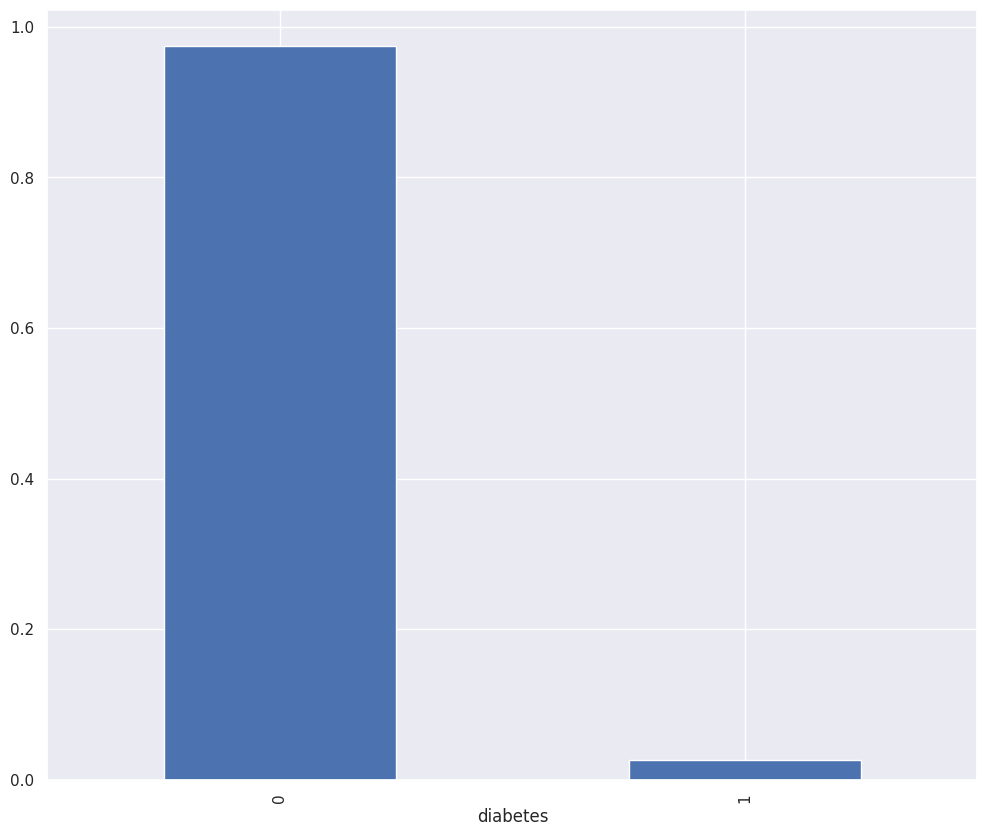

In [22]:
df['diabetes'].value_counts(normalize = True).plot(kind = 'bar')
plt.show()

##1.5 Correlation Matrix

In [23]:
df.corr()

,sex,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
sex,1.000000,-0.028979,0.197596,0.315630,-0.061888,-0.004546,0.005313,0.015708,-0.069974,-0.035989,0.057933,0.081506,-0.116601,0.010073,0.088428
age,-0.028979,1.000000,-0.213748,-0.191847,0.130383,0.057655,0.307194,0.101258,0.260270,0.394302,0.206104,0.135283,-0.012819,0.117788,0.225256
currentSmoker,0.197596,-0.213748,1.000000,0.760239,-0.048259,-0.032988,-0.103260,-0.044295,-0.046285,-0.130230,-0.107746,-0.167276,0.062348,-0.055177,0.019456
cigsPerDay,0.315630,-0.191847,0.760239,1.000000,-0.041689,-0.032244,-0.065046,-0.036150,-0.026816,-0.088375,-0.056687,-0.092332,0.073866,-0.056863,0.058859
BPMeds,-0.061888,0.130383,-0.048259,-0.041689,1.000000,0.107138,0.232065,0.048042,0.071485,0.225971,0.164836,0.080685,0.013678,0.043087,0.082482
prevalentStroke,-0.004546,0.057655,-0.032988,-0.032244,0.107138,1.000000,0.074830,0.006949,0.000067,0.057009,0.045190,0.024840,-0.017676,0.018722,0.061810
prevalentHyp,0.005313,0.307194,-0.103260,-0.065046,0.232065,0.074830,1.000000,0.077808,0.163041,0.696755,0.615751,0.300572,0.147222,0.083571,0.177603
diabetes,0.015708,0.101258,-0.044295,-0.036150,0.048042,0.006949,0.077808,1.000000,0.040092,0.111283,0.050329,0.086250,0.048993,0.606493,0.097317
totChol,-0.069974,0.260270,-0.046285,-0.026816,0.071485,0.000067,0.163041,0.040092,1.000000,0.207609,0.163903,0.114789,0.090676,0.045520,0.081624
sysBP,-0.035989,0.394302,-0.130230,-0.088375,0.225971,0.057009,0.696755,0.111283,0.207609,1.000000,0.784002,0.325247,0.182174,0.135136,0.216429


<Axes: >

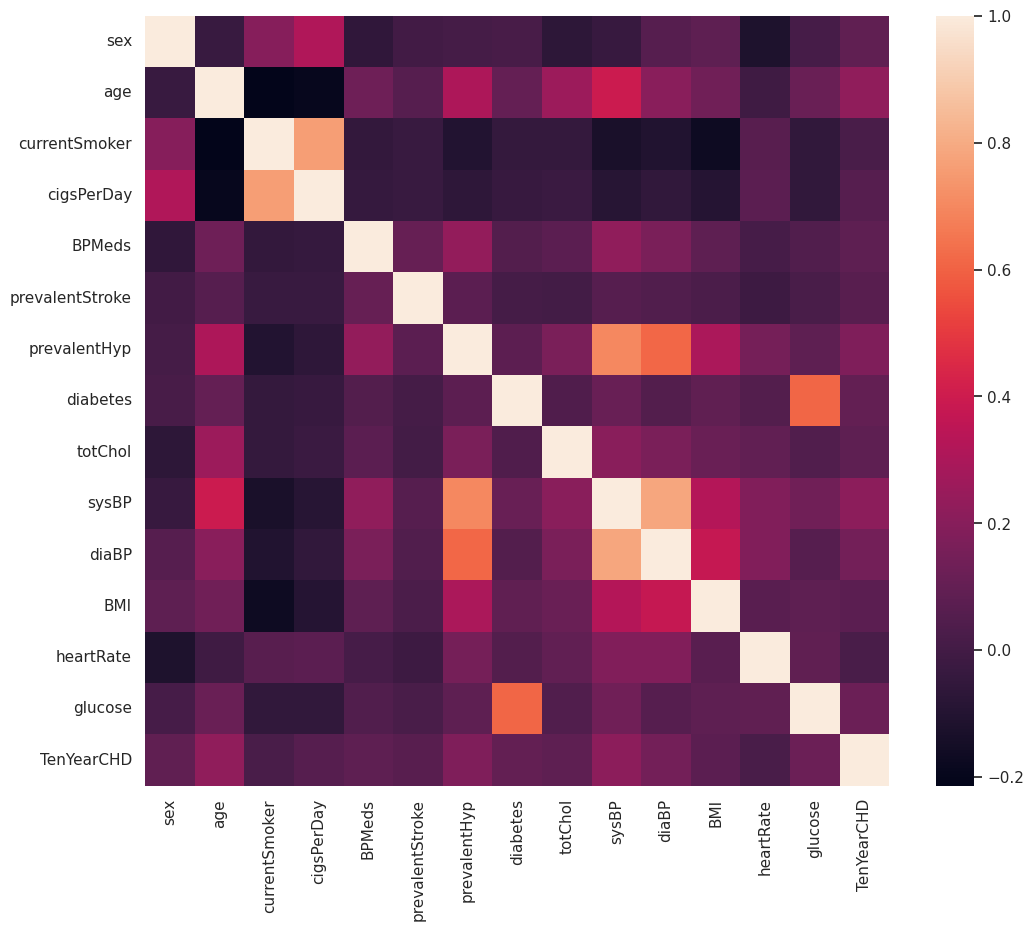

In [24]:
sns.heatmap(df.corr())

In [ ]:
## 1.6 Investigating unique element in each feature

In [25]:
#Investigate the element in each feature
for columns in df:
  unique_values = np.unique(df[columns])
  nr_values = len(unique_values)
  if len(unique_values) <= 10:
    print("the number of values for feature {} is {}......{}".format(columns, nr_values, unique_values))
  else:
    print("the number of values for feature {} is {}".format(columns, nr_values))


the number of values for feature sex is 2......[0 1]
the number of values for feature age is 39
the number of values for feature currentSmoker is 2......[0 1]
the number of values for feature cigsPerDay is 33
the number of values for feature BPMeds is 2......[0.000000 1.000000]
the number of values for feature prevalentStroke is 2......[0 1]
the number of values for feature prevalentHyp is 2......[0 1]
the number of values for feature diabetes is 2......[0 1]
the number of values for feature totChol is 249
the number of values for feature sysBP is 234
the number of values for feature diaBP is 146
the number of values for feature BMI is 1364
the number of values for feature heartRate is 74
the number of values for feature glucose is 143
the number of values for feature TenYearCHD is 2......[0 1]


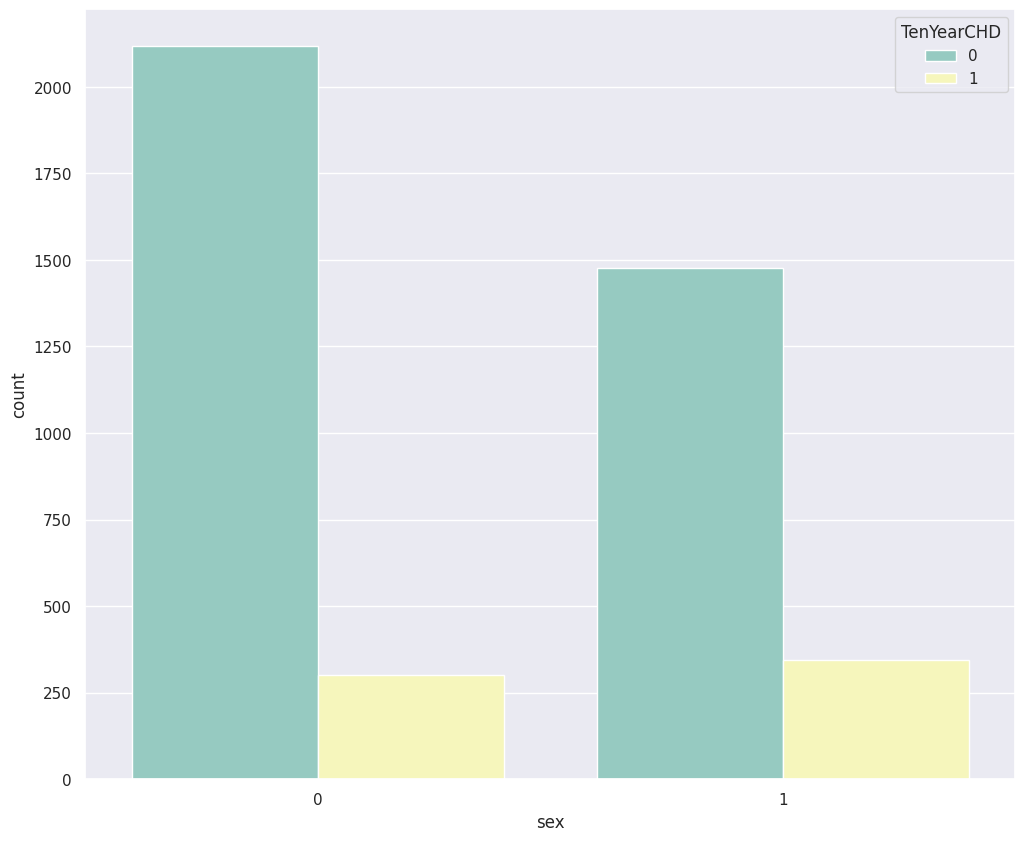

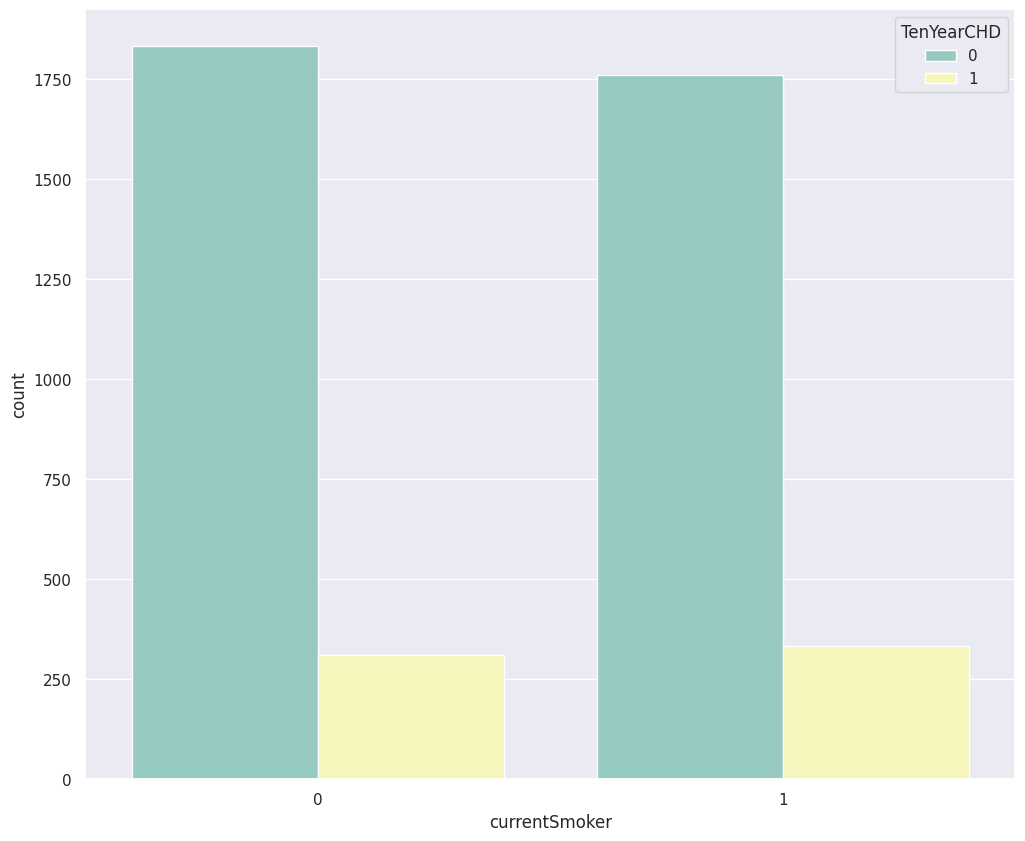

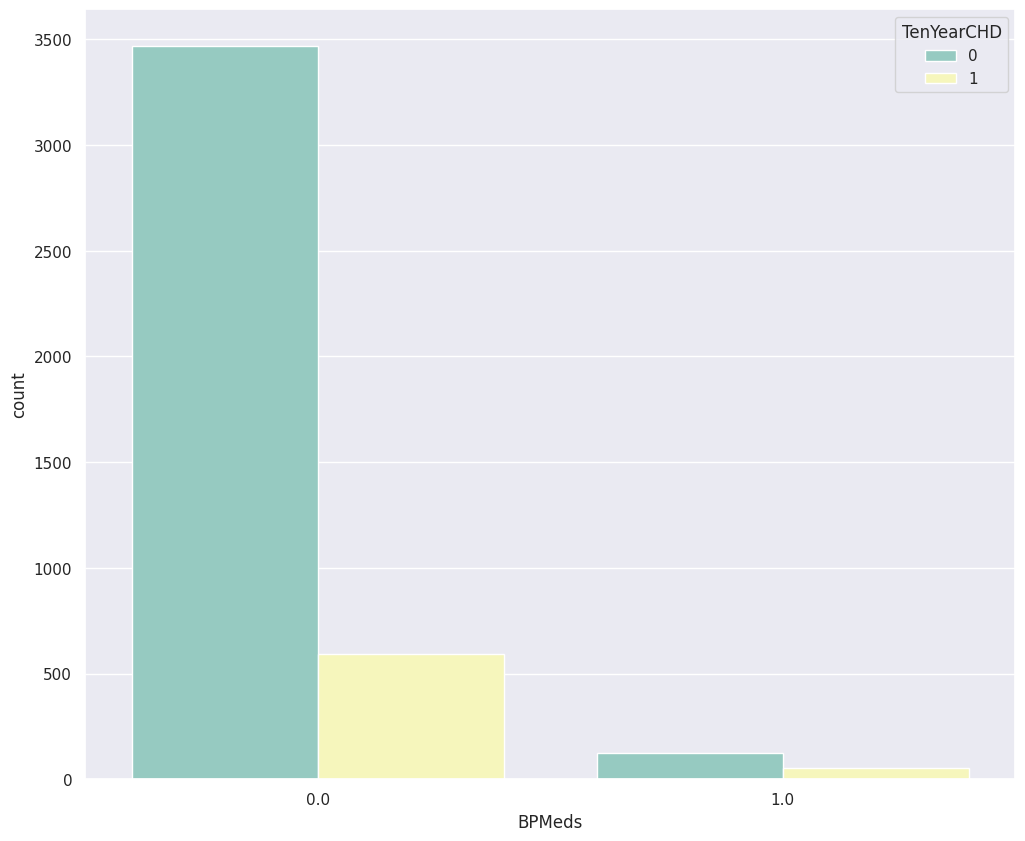

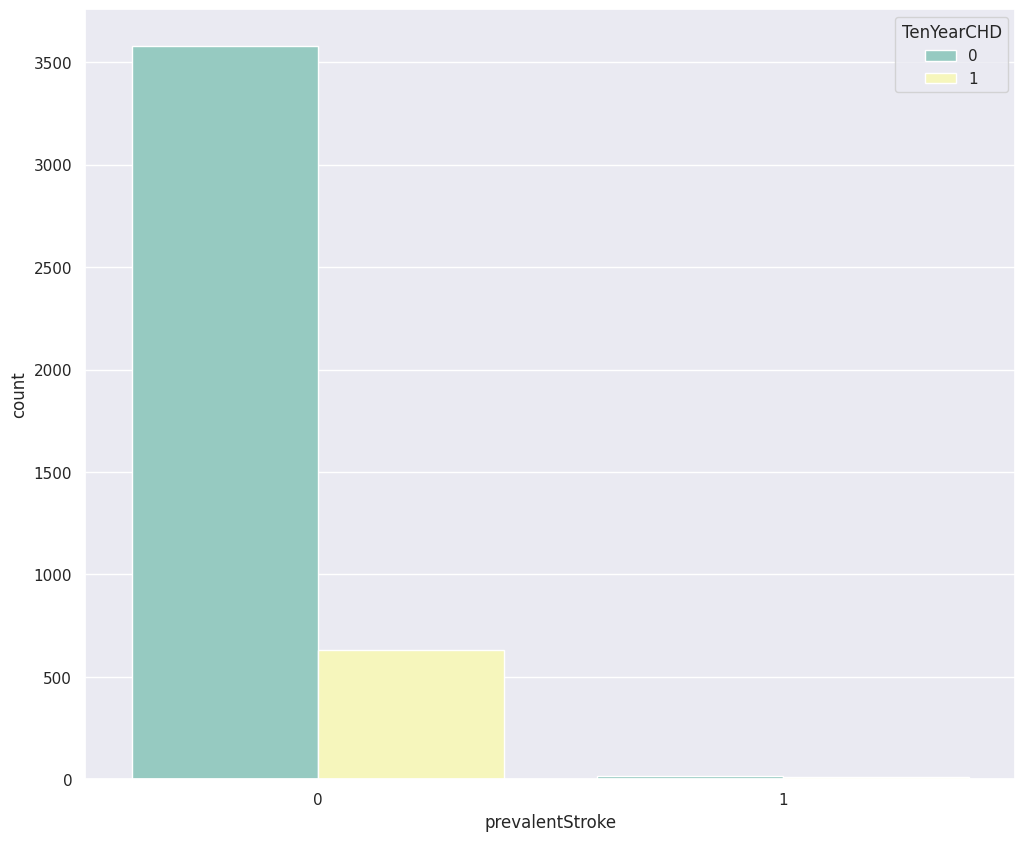

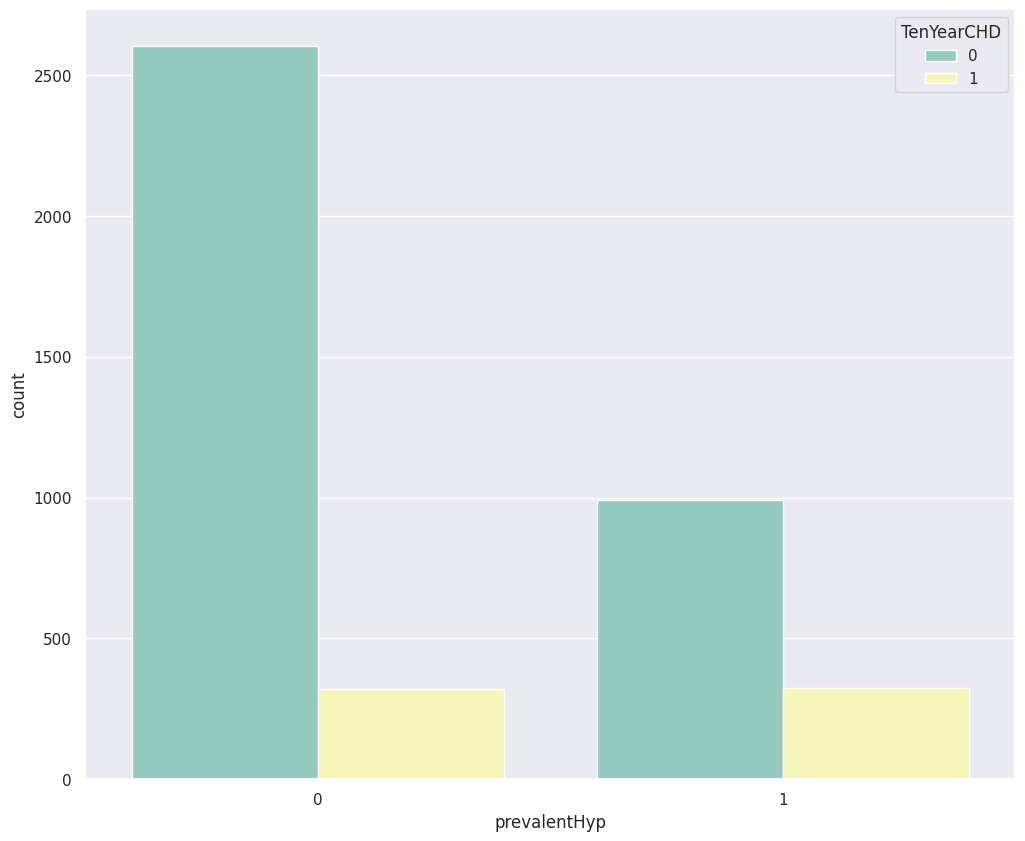

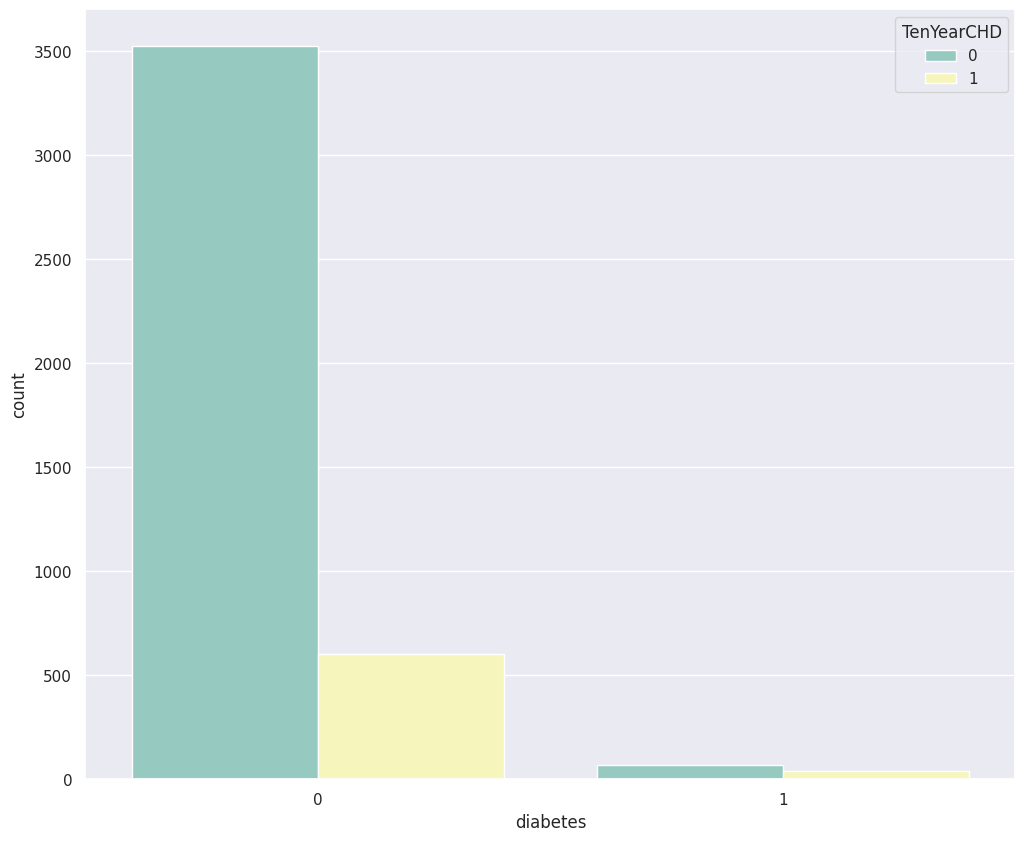

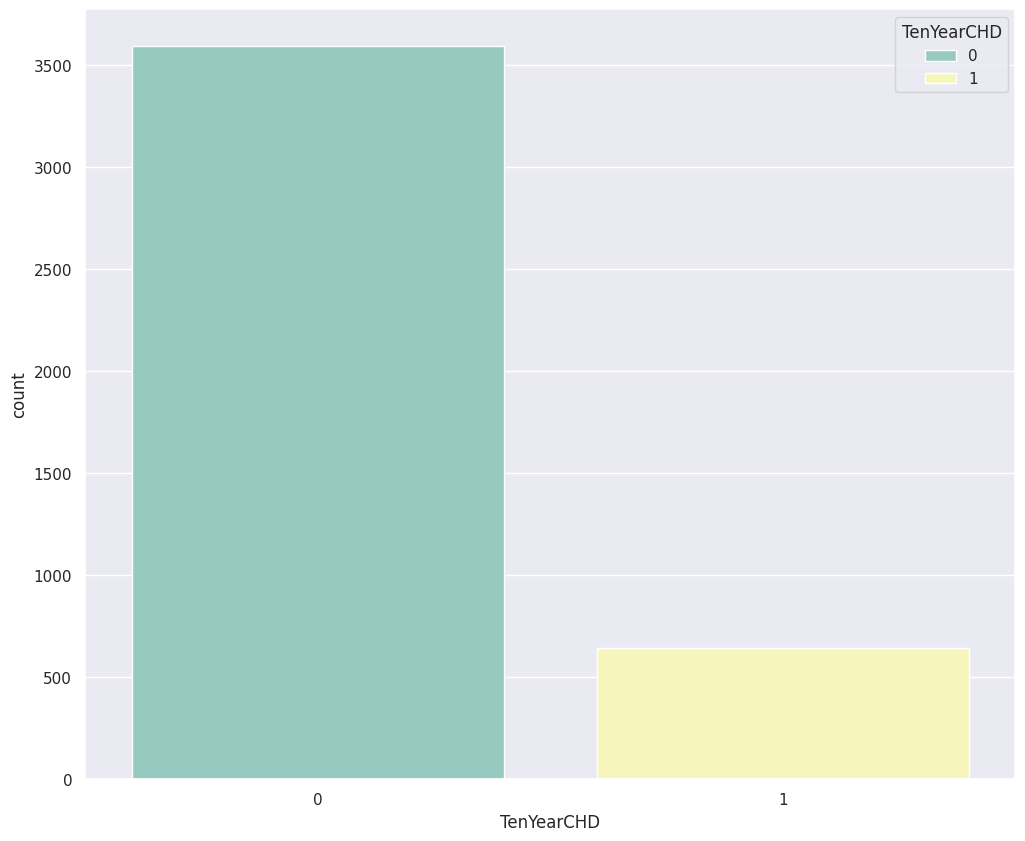

do not print


In [71]:
# Looping through all the features by our y variable - see if there is relationship
features = ['sex','currentSmoker', 'BPMeds',
            'prevalentStroke', 'prevalentHyp',
            'diabetes', 'TenYearCHD']

for f in features:
 sns.countplot(x = f, data = df, hue = 'TenYearCHD', palette = 'Set3')
 plt.show()
else:
  print("do not print")

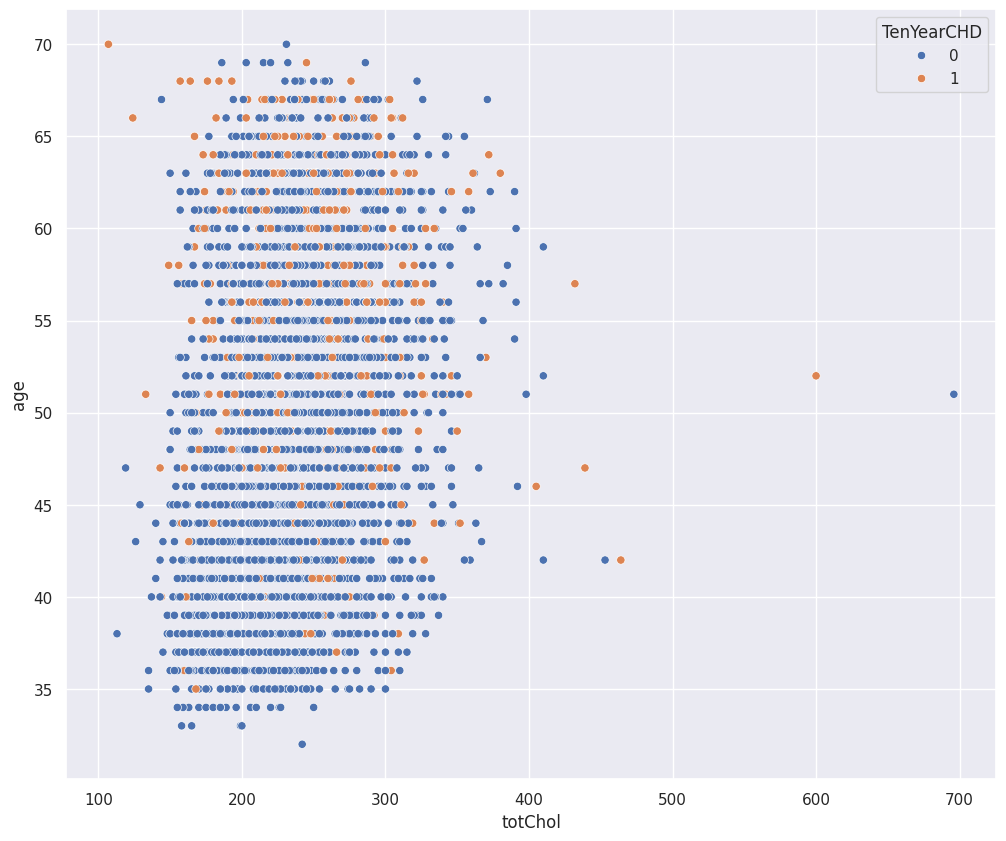

In [27]:
sns.scatterplot(data = df, x = 'totChol', y = 'age', hue = 'TenYearCHD')
plt.show()

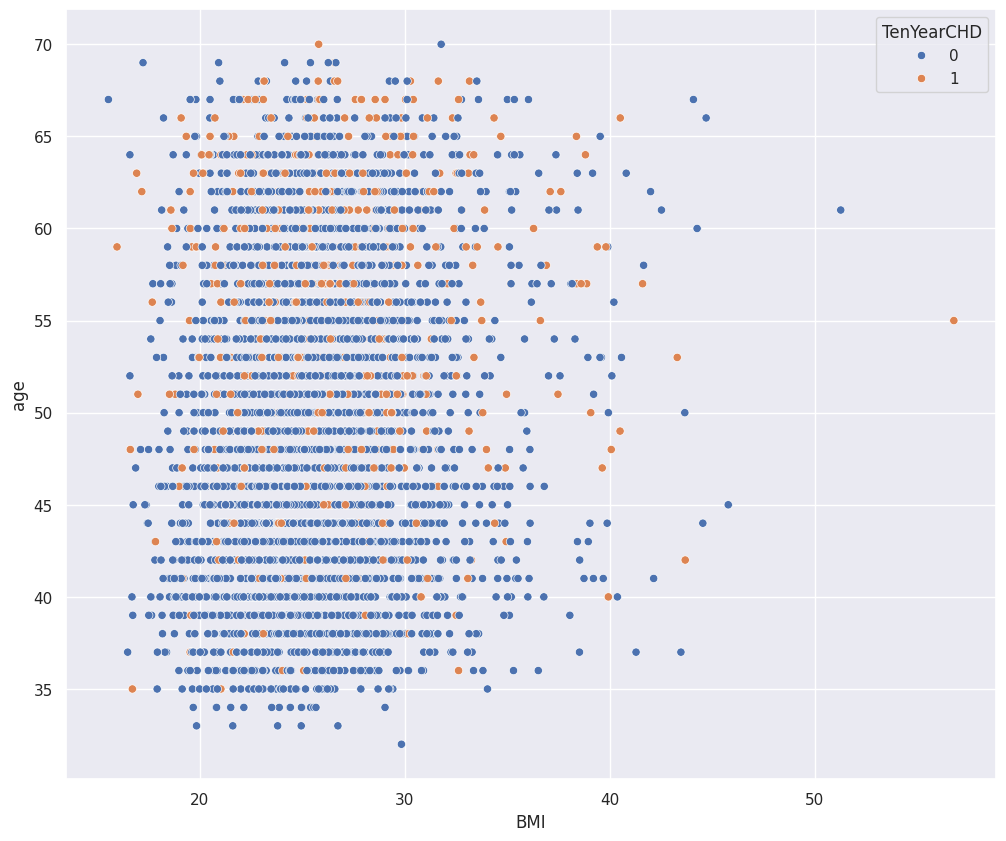

In [28]:
sns.scatterplot(data = df, x = 'BMI', y = 'age', hue = 'TenYearCHD')
plt.show()

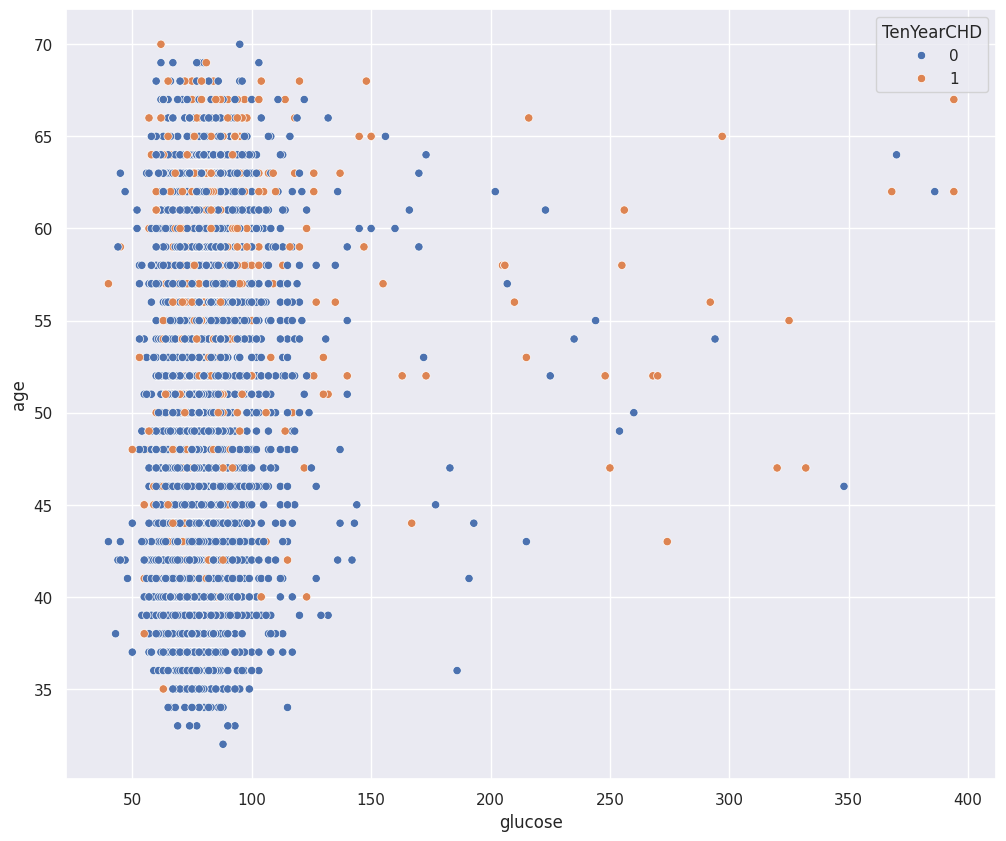

In [66]:
sns.scatterplot(data = df, x = 'glucose', y = 'age', hue = 'TenYearCHD')
plt.show()

In [29]:
import pandas as pd
df
new_df = df[df['totChol'] <= 500]
new_df

,sex,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,1,20.0,1.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,78.0,0


In [30]:
import pandas as pd
new_df
new_df1 = new_df[new_df['BMI'] <= 50]
new_df1

,sex,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,1,20.0,1.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,78.0,0


In [75]:
new_df1.nunique().sort_values()

,0
sex,2
currentSmoker,2
BPMeds,2
prevalentStroke,2
prevalentHyp,2
diabetes,2
TenYearCHD,2
cigsPerDay,33
age,39
heartRate,74


##1.6 Generate Machine Learning Model
(a) The imbalance in the target variable

In [32]:
#Distribution of the target (y) variable
new_df1['TenYearCHD'].value_counts(normalize = True)

,proportion
TenYearCHD,
0,0.84837
1,0.15163


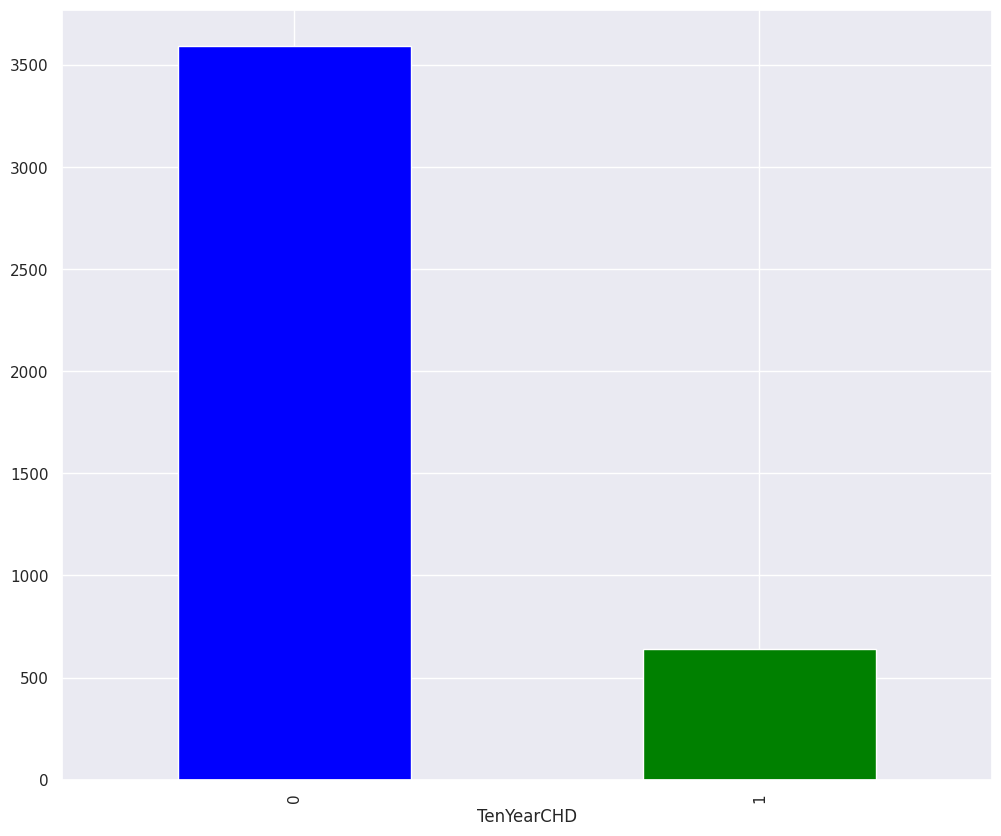

In [76]:
##Visualize the distribution of the target varible
new_df1['TenYearCHD'].value_counts().plot(kind = 'bar', color = ['blue', 'green'])
plt.show()

In [77]:
# Split data into (x) & (y)
x = new_df1.drop('TenYearCHD', axis=1)  # This keeps x as a DataFrame
y = new_df1['TenYearCHD'] # This keeps y as a DataFrame

# Check data types
y = y.astype(int)
x = x.astype(int)

# Print shapes of x and y
print(x.shape)
print(y.shape)

# Check the columns of x
print("Columns in x:", x.columns)

(4234, 14)
(4234,)
Columns in x: Index(['sex', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose'],
      dtype='object')


##Synthetic Minority Oversampling(SMOTE)
Finding a way to balance our Data

In [82]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state = 15)

# Assigning the results of fit_resample to x_os and y_os
x_os, y_os = os.fit_resample(x, y)
x_os.shape, y_os.shape

((7184, 14), (7184,))

In [36]:
##distribution of our new (y) variable
y_os.value_counts(normalize = True)


,proportion
TenYearCHD,
0,0.5
1,0.5


<ipython-input-37-6e73d3813534>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = y_os, palette = 'Set3')


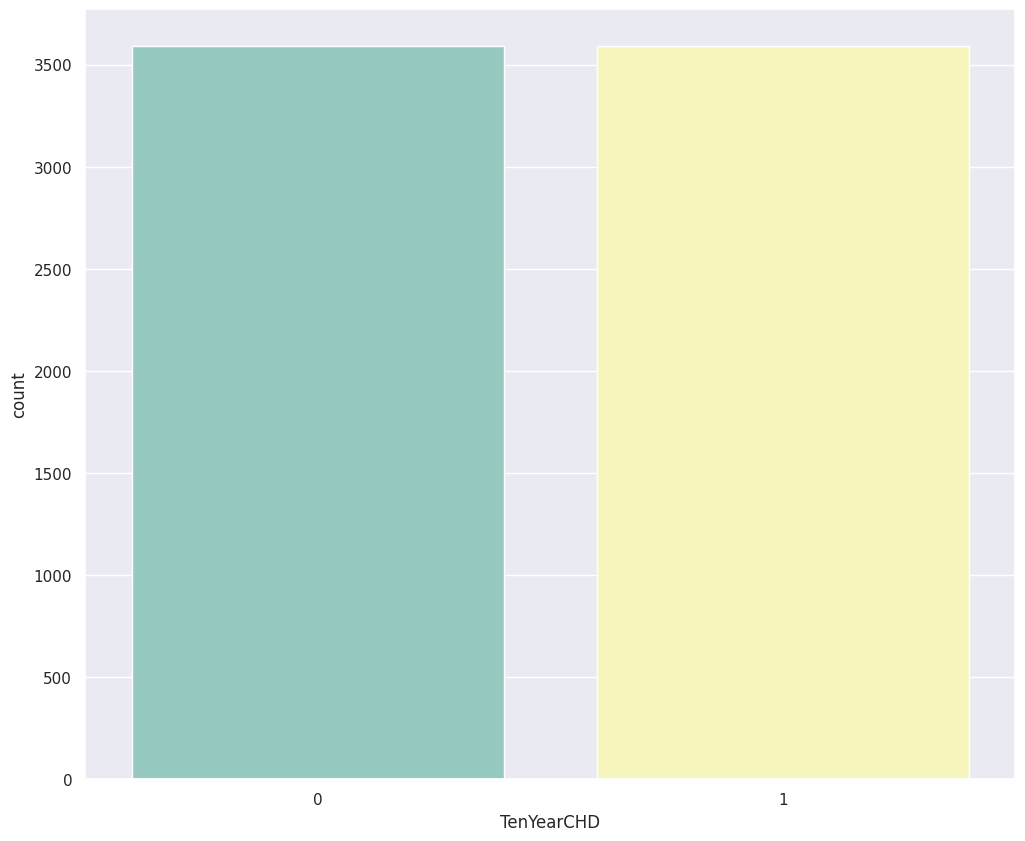

In [37]:
sns.countplot(x = y_os, palette = 'Set3')
plt.show()

In [38]:
x_os

,sex,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,0,0,0,0,0,0,195,106,70,26,80,77
1,0,46,0,0,0,0,0,0,250,121,81,28,95,76
2,1,48,1,20,0,0,0,0,245,127,80,25,75,70
3,0,61,1,30,0,0,1,0,225,150,95,28,65,103
4,0,46,1,23,0,0,0,0,285,130,84,23,85,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7179,1,49,1,17,0,0,0,0,210,129,89,31,74,76
7180,1,42,1,21,0,0,0,0,236,126,83,30,80,81
7181,0,49,0,4,0,0,0,0,229,99,72,24,76,71
7182,0,63,0,0,0,0,1,0,254,190,90,24,100,110


In [39]:
y_os

,TenYearCHD
0,0
1,0
2,0
3,1
4,0
...,...
7179,1
7180,1
7181,1
7182,1


In [80]:
new_df1_os = pd.DataFrame(x_os, columns = x.columns)
new_df1_os['TenYearCHD'] = y_os

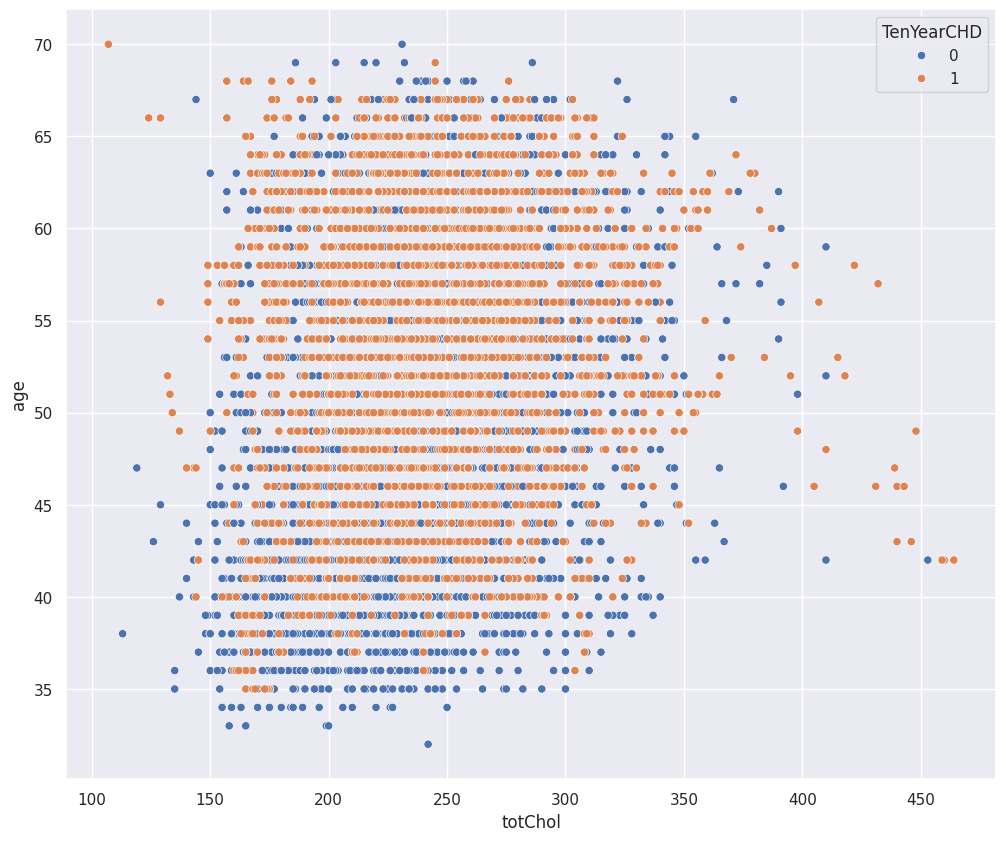

In [41]:
sns.scatterplot(data = new_df1_os, x = 'totChol', y = 'age', hue = 'TenYearCHD')
plt.show()

##1.7 Finding the importance of Features against the (y) variables

In [83]:
# Run a Tree-based estimators (i.e. decision trees & random forests)

dt = DecisionTreeClassifier(random_state=15, criterion = 'entropy', max_depth = 10)
dt.fit(x, y)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=15)

In [43]:
# Running Feature Importance

fi_col = []
fi = []

for i,column in enumerate(new_df1_os.drop('TenYearCHD', axis=1)):
    print('The feature importance for {} is : {}'.format(column, dt.feature_importances_[i]))

fi_col.append(column)
fi.append(dt.feature_importances_[i])

The feature importance for sex is : 0.027758441849072873
The feature importance for age is : 0.18445158457670893
The feature importance for currentSmoker is : 0.006545700411696863
The feature importance for cigsPerDay is : 0.045590766373209565
The feature importance for BPMeds is : 0.0
The feature importance for prevalentStroke is : 0.0
The feature importance for prevalentHyp is : 0.05359315605058039
The feature importance for diabetes is : 0.0033596593073607615
The feature importance for totChol is : 0.0982879078718284
The feature importance for sysBP is : 0.14914402044398195
The feature importance for diaBP is : 0.09803528922100041
The feature importance for BMI is : 0.09876534112281231
The feature importance for heartRate is : 0.10304857286971959
The feature importance for glucose is : 0.131419559902028


In [44]:
import pandas as pd

# Initialize lists for features and their importance values
fi_col = []
fi = []

# Populate the lists with feature names and importance scores, excluding zeros
for i, column in enumerate(new_df1_os.drop('TenYearCHD', axis=1)):
    importance = dt.feature_importances_[i]
    if importance > 0:  # Only include features with importance greater than 0
        print(f'The feature importance for {column} is : {importance}')
        fi_col.append(column)
        fi.append(importance)

#Create a DataFrame for the non-zero feature importances
fi_df = pd.DataFrame(zip(fi_col, fi), columns=['Feature', 'Feature Importance'])

# Sort the DataFrame by 'Feature Importance' in descending order
fi_df = fi_df.sort_values('Feature Importance', ascending=False).reset_index(drop=True)

# Select the top 10 features based on sorted values
columns_to_keep = fi_df['Feature'].head(10)

# Display the sorted DataFrame to confirm
print(fi_df.head(10))

The feature importance for sex is : 0.027758441849072873
The feature importance for age is : 0.18445158457670893
The feature importance for currentSmoker is : 0.006545700411696863
The feature importance for cigsPerDay is : 0.045590766373209565
The feature importance for prevalentHyp is : 0.05359315605058039
The feature importance for diabetes is : 0.0033596593073607615
The feature importance for totChol is : 0.0982879078718284
The feature importance for sysBP is : 0.14914402044398195
The feature importance for diaBP is : 0.09803528922100041
The feature importance for BMI is : 0.09876534112281231
The feature importance for heartRate is : 0.10304857286971959
The feature importance for glucose is : 0.131419559902028
        Feature  Feature Importance
0           age            0.184452
1         sysBP            0.149144
2       glucose            0.131420
3     heartRate            0.103049
4           BMI            0.098765
5       totChol            0.098288
6         diaBP          

##1.8 Correlation Display of Significant Features against the (y) variable

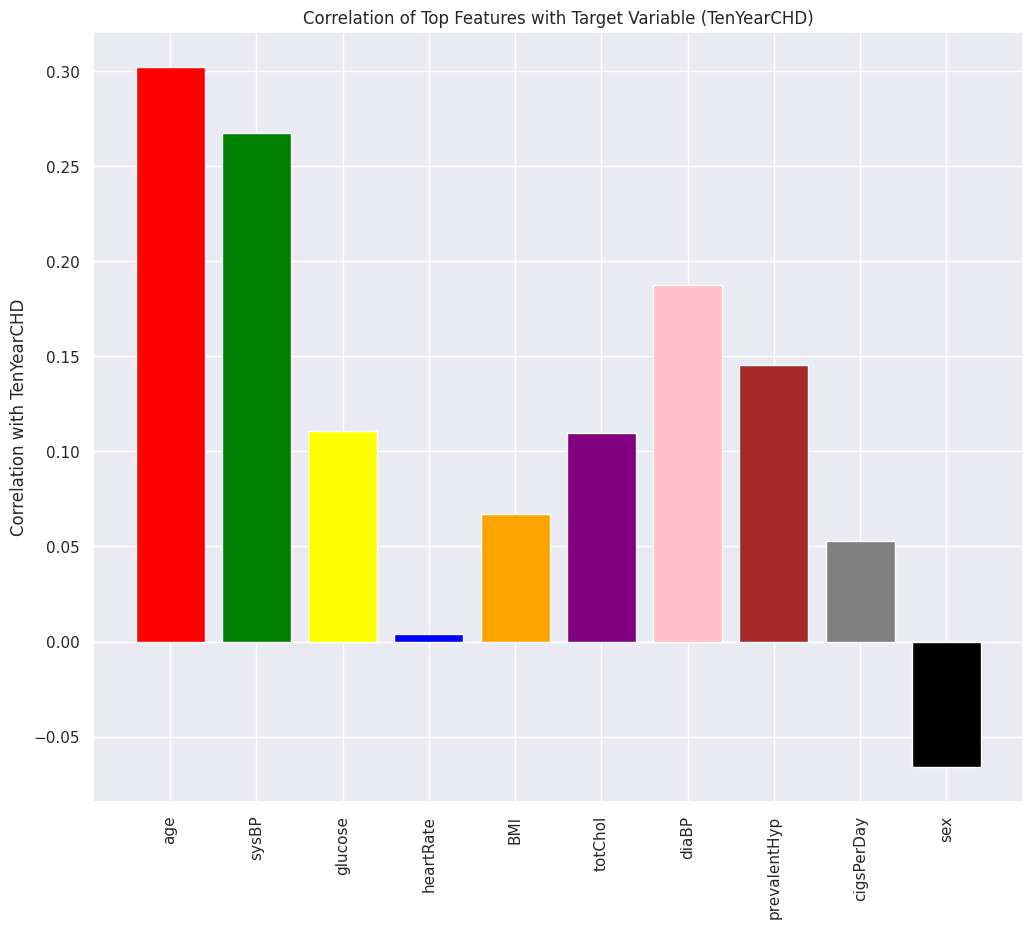

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a new DataFrame with only the selected columns and the target variable
top_features_df = new_df1_os[columns_to_keep.tolist() + ['TenYearCHD']]

# Compute correlation of each feature with the target variable 'TenYearCHD'
correlations = top_features_df.corr()['TenYearCHD'][:-1]  # Exclude 'TenYearCHD' itself

# Define colors for the bar chart
colors = ['red', 'green', 'yellow', 'blue', 'orange', 'purple', 'pink', 'brown', 'gray', 'black']

# Plot the correlation values as a bar chart
plt.bar(correlations.index, correlations.values, color=colors[:len(correlations)])
plt.xticks(rotation=90)
plt.ylabel('Correlation with TenYearCHD')
plt.title('Correlation of Top Features with Target Variable (TenYearCHD)')
plt.show()

In [86]:
# Print the shapes
print(new_df1_os.shape)
print(new_df1_os[columns_to_keep].shape)

(7184, 15)
(7184, 10)


##1.9 Splitting Balanced data into (x) & (y)

In [47]:
# Split the data into x & y

x = new_df1_os[columns_to_keep].values
x

y = new_df1_os['TenYearCHD']
y = y.astype(int)
y

print(x.shape)
print(y.shape)

(7184, 10)
(7184,)


In [48]:
# first one
x_train, x_test, y_train,y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state =15)

# Second one
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, train_size = 0.9, test_size=0.1, random_state=15)

print(x_train.shape)
print(x_test.shape)
print(x_valid.shape)


print(y_train.shape)
print(y_test.shape)
print(y_valid.shape)

(5172, 10)
(1437, 10)
(575, 10)
(5172,)
(1437,)
(575,)


<ipython-input-87-e0068cbf3402>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = y_valid,  palette = "Set3")


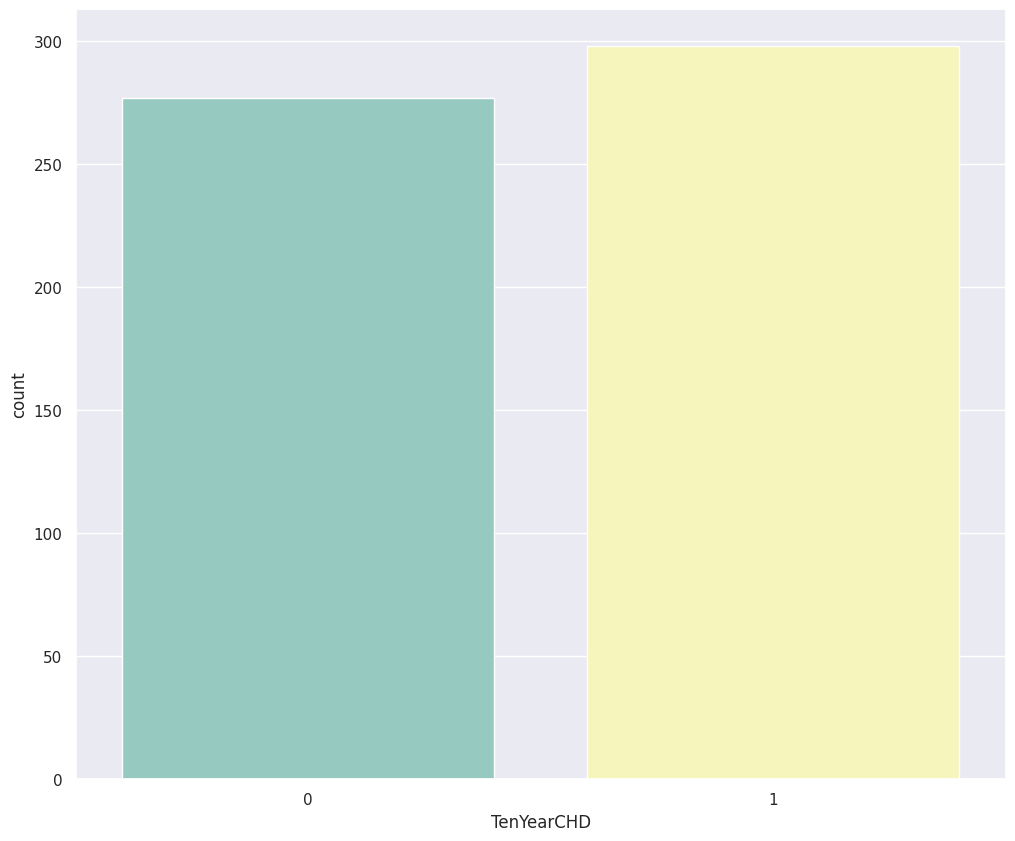

In [87]:
#Investigating the distribution of all y's

ax = sns.countplot(x = y_valid,  palette = "Set3")

##2.0 Training my model deploying Logistic regression

In [50]:
# Training my model

log_reg = LogisticRegression(random_state=10, solver = 'lbfgs')

log_reg.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=10)

In [93]:
# Methods we can use in Logistic

# predict - Predict class labels for samples in X
log_reg.predict(x_train)
y_pred = log_reg.predict(x_train)

# predict_proba - Probability estimates
pred_proba = log_reg.predict_proba(x_train)

# coef_ - Coefficient of the features in the decision function
log_reg.coef_


array([[0.040189, 0.013862, 0.002752, -0.032280, -0.031060, -0.000930,
        -0.004512, 0.206470, 0.024525, -0.412354]])

In [52]:
# Extract feature names from the original DataFrame (x)
# Assuming 'x' was your original DataFrame and it's been overwritten,
# you need to reload it or recreate the feature names.
# If you know the feature names, you can directly assign them:
feature_names = ['age', 'sysBP', 'glucose', 'heartRate', 'BMI', 'totChol', 'diaBP', 'prevalentHyp', 'cigsPerDay', 'sex']  # Replace with your actual feature names if different

# Alternatively, if you have access to the original DataFrame, use:
# feature_names = original_x.columns

# Extract coefficients from the logistic regression model
coefficients = log_reg.coef_[0]  # Assuming binary classification, where there's only one row of coefficients

# Create a DataFrame with the original feature names and their coefficients
coeff_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Display the table
print(coeff_df)

        Feature  Coefficient
0           age     0.040189
1         sysBP     0.013862
2       glucose     0.002752
3     heartRate    -0.032280
4           BMI    -0.031060
5       totChol    -0.000930
6         diaBP    -0.004512
7  prevalentHyp     0.206470
8    cigsPerDay     0.024525
9           sex    -0.412354


##2.1 Investigating the Accuracy of our trained Data

In [53]:
# Accuracy on Train
print("The Training Accuracy is: ", log_reg.score(x_train, y_train))

# Accuracy on Test
print("The Testing Accuracy is: ", log_reg.score(x_test, y_test))

# Classification Report
print(classification_report(y_train, y_pred))

The Training Accuracy is:  0.6334106728538283
The Testing Accuracy is:  0.6207376478775226
              precision    recall  f1-score   support

           0       0.64      0.63      0.63      2587
           1       0.63      0.64      0.64      2585

    accuracy                           0.63      5172
   macro avg       0.63      0.63      0.63      5172
weighted avg       0.63      0.63      0.63      5172



In [54]:
# Confusion Matrix function

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, cmap="YlGnBu", xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

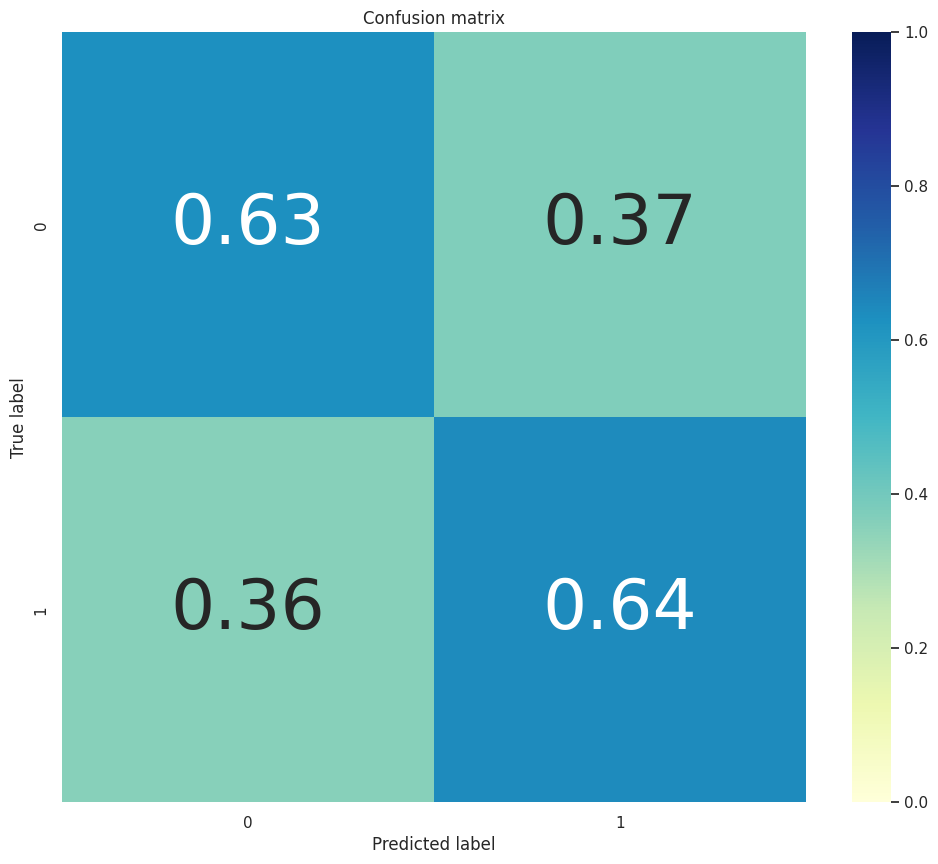

In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have your y_train and y_pred defined
# y_train = ... (Your true labels)
# y_pred = ... (Your predicted labels from the model)

# Calculate the confusion matrix
cm = confusion_matrix(y_train, y_pred)
cm

#Normalize
cm_norm = cm / cm.sum(axis = 1).reshape(-1,1)
cm_norm

plot_confusion_matrix(cm_norm, classes = log_reg.classes_, title='Confusion matrix')

In [56]:
log_reg.classes_

array([0, 1])

In [57]:
cm.sum(axis=1)
cm_norm

array([[0.626981, 0.373019],
       [0.360155, 0.639845]])

In [58]:
cm

array([[1622,  965],
       [ 931, 1654]])

In [59]:
cm.sum(axis=0)

array([2553, 2619])

In [60]:
cm.sum(axis=1)

array([2587, 2585])

In [61]:
np.diag(cm)

array([1622, 1654])

In [62]:
# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)

FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)


# Sensitivity, hit rate, recall, or true positive rate
TPR = TP / (TP + FN)
print("The True Positive Rate is:", TPR)

# Precision or positive predictive value
PPV = TP / (TP + FP)
print("The Precision is:", PPV)

# False positive rate or False alarm rate
FPR = FP / (FP + TN)
print("The False positive rate is:", FPR)


# False negative rate or Miss Rate
FNR = FN / (FN + TP)
print("The False Negative Rate is: ", FNR)



##Total averages :
print("")
print("The average TPR is:", TPR.sum()/2)
print("The average Precision is:", PPV.sum()/2)
print("The average False positive rate is:", FPR.sum()/2)
print("The average False Negative Rate is:", FNR.sum()/2)

The True Positive Rate is: [0.626981 0.639845]
The Precision is: [0.635331 0.631539]
The False positive rate is: [0.360155 0.373019]
The False Negative Rate is:  [0.373019 0.360155]

The average TPR is: 0.63341316013186
The average Precision is: 0.6334348692035828
The average False positive rate is: 0.36658683986814
The average False Negative Rate is: 0.36658683986814
